# Teoria das filas

Análise de um sistema de filas M/M/1

(Baseado no livro Modeling Random Systems - J. R. Cogdell - Seção 5.3 pg 500)

In [7]:
"""
@author: albert
IQuanta - DEE - UFCG
Data: março 2022
Versão: 1.0
"""

import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

## Tempo entre chegadas

Nesse modelo os clientes chegam de acordo com uma distribuição de Poisson, portanto o tempo entre chegadas de clientes tem uma distribuição exponencial

São geradas 10 variáveis aleatórias exponenciais com com taxa de chegada de $\lambda$ cliente/min.



In [69]:
Numero_clientes = 10
taxa_chegadas = 1
taxa_servico = 1.5

# tempo_entrechegadas = [0.854, 0.184, 3.22, 2.65, 1.59, 0.384, 0.993, 0.07, 2.33, 0.503]
tempo_entrechegadas = random.exponential(scale=(1/taxa_chegadas), size=(Numero_clientes))
np.set_printoptions(precision=2)
print('Tempo entre chegadas = ', tempo_entrechegadas)

Tempo entre chegadas =  [2.84 1.17 1.11 0.08 0.61 0.33 0.29 1.15 0.38 1.69]


O primeiro cliente chega no tempo

In [76]:
print('%.2f'% tempo_entrechegadas[0], ' min')

2.84  min


o segundo cliente 

In [75]:
print('%.2f'% tempo_entrechegadas[1], ' min')

1.17  min


depois do primeiro, e assim por diante.

## Tempo de atendimento (serviço)

Os tempos de atendimento são modelados também por uma v.a. exponencial com uma taxa de $\lambda_S$ clientes/min

In [71]:
# tempo_servico = [1.46, 0.442, 0.282, 0.969, 0.486, 0.57, 0.657, 1.32, 0.0195, 0.71]
tempo_servico = random.exponential(scale=(1/taxa_servico), size=(Numero_clientes))
print('Tempo de atendimento = ', tempo_servico)

Tempo de atendimento =  [1.11 0.46 0.23 0.73 0.23 0.19 0.46 0.25 0.07 0.97]


Ou seja o primeiro cliente levou

In [77]:
print('%.2f'% tempo_servico[0], ' min')

1.11  min


sendo atendido, o segundo cliente levou

In [78]:
print('%.2f'% tempo_servico[1], ' min')

0.46  min


sendo atendido e assim por diante.

## Tempo de chegada

O primeiro cliente chega ao sistema em

In [79]:
print('%.2f'% tempo_entrechegadas[0], ' min')

2.84  min


o segundo cliente chega ao sistema em

In [81]:
print('%.2f'% (tempo_entrechegadas[0] + tempo_entrechegadas[1]), ' min')

4.01  min


e assim por diante.

Tempo de chegada  [2.84 4.01 5.11 5.19 5.8  6.13 6.42 7.57 7.95 9.64]


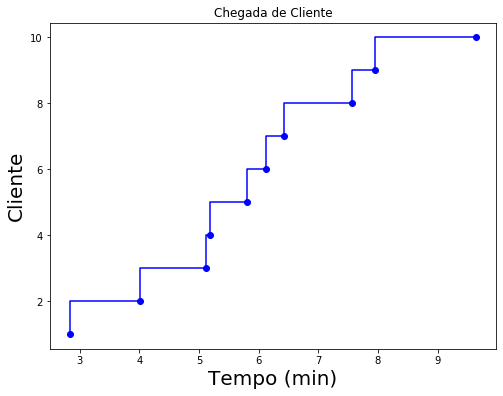

In [94]:
tempo_chegada = np.zeros(Numero_clientes)
# for k in range(Numero_clientes):
#    tempo_chegada.append(0)
    
for i in range(Numero_clientes):
    if(i == 0):
        tempo_chegada[0] = tempo_entrechegadas[0]
    else:
        tempo_chegada[i] = tempo_chegada[i-1] + tempo_entrechegadas[i]

print('Tempo de chegada ', tempo_chegada)

cliente = list(range(1, Numero_clientes+1))

plt.figure(figsize=(8,6))
plt.title("Chegada de Cliente")
plt.ylabel("Cliente", fontsize=20)
plt.xlabel("Tempo (min)", fontsize=20)
plt.step(tempo_chegada, cliente, 'bo-')
plt.show()

## Tempo de saída

O tempo de saída é calculado da seguinte forma:
- o primeiro cliente é imediatamente atendido e portanto o seu tempo de saída é tempo de chegada + tempo de atendimento
- se o segundo cliente chegar antes do primeiro ter saído o seu tempo de saída é o tempo de saída do primeiro cliente + o seu tempo de atendimento, caso contrário seu tempo de saída é o seu tempo de chegada + seu tempo de atendimento
- o mesmo procedimento para os seguintes 

Tempo de saida  [ 3.95  4.47  5.34  6.07  6.31  6.49  6.95  7.83  8.02 10.61]


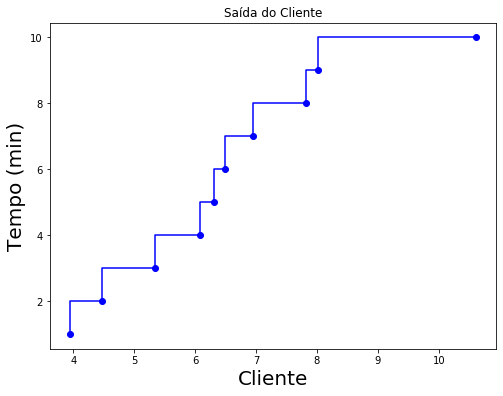

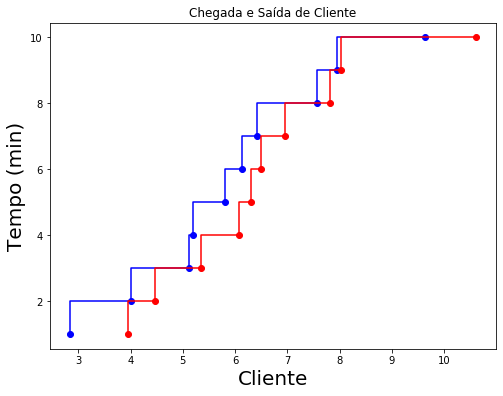

In [95]:
tempo_saida = np.zeros(Numero_clientes)
#for k in range(Numero_clientes):
#    tempo_saida.append(0)
    
for i in range(Numero_clientes):
    if(i == 0):
        tempo_saida[0] = tempo_chegada[0] + tempo_servico[0]
    else:
        if(tempo_chegada[i] < tempo_saida[i-1]):
            tempo_saida[i] = tempo_saida[i-1] + tempo_servico[i]
        else:
            tempo_saida[i] = tempo_chegada[i] + tempo_servico[i]

print('Tempo de saida ', tempo_saida)

plt.figure(figsize=(8,6))
plt.title("Saída do Cliente")
plt.xlabel("Cliente", fontsize=20)
plt.ylabel("Tempo (min)", fontsize=20)
plt.step(tempo_saida, cliente, 'bo-')
plt.show()

plt.figure(figsize=(8,6))
plt.title("Chegada e Saída de Cliente")
plt.xlabel("Cliente", fontsize=20)
plt.ylabel("Tempo (min)", fontsize=20)
plt.step(tempo_chegada, cliente, 'bo-')
plt.step(tempo_saida, cliente, 'ro-')

plt.show()

## Tempo na fila

O tempo na fila é calculado da seguinte forma:
- o primeiro cliente é imediatamente atendido, 
- se o segundo cliente chegar antes do primeiro terminar o seu tempo na fila será o tempo de saída do primeiro menos o seu tempo de chegada, caso contrário ele é imediatamente atendido
- e assim por diante

Tempo na fila  [0.   0.   0.   0.15 0.27 0.18 0.07 0.   0.   0.  ]


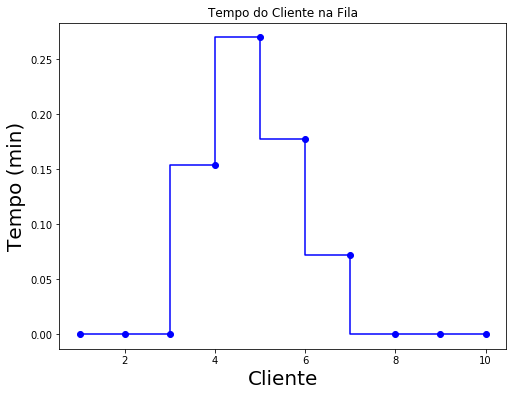

In [96]:
tempo_fila = np.zeros(Numero_clientes)
#for k in range(Numero_clientes):
#    tempo_fila.append(0)
    
for i in range(Numero_clientes):
    if(i == 0):
        tempo_fila[0] = 0
    else:
        if(tempo_chegada[i] < tempo_saida[i-1]):
            tempo_fila[i] = tempo_saida[i-1] - tempo_chegada[i]
        else:
            tempo_fila[i] = 0

print('Tempo na fila ', tempo_fila)

plt.figure(figsize=(8,6))
plt.title("Tempo do Cliente na Fila")
plt.xlabel("Cliente", fontsize=20)
plt.ylabel("Tempo (min)", fontsize=20)
plt.step( cliente, tempo_fila, 'bo-')

plt.show()

## Tempo do cliente no sistema

O tempo do cliente no sistema é a diferença entre seu tempo de chegada no sistema e o tempo de saída do sistema.

tempo do cliente no sistema [1.11 0.46 0.23 0.88 0.5  0.36 0.53 0.25 0.07 0.97]


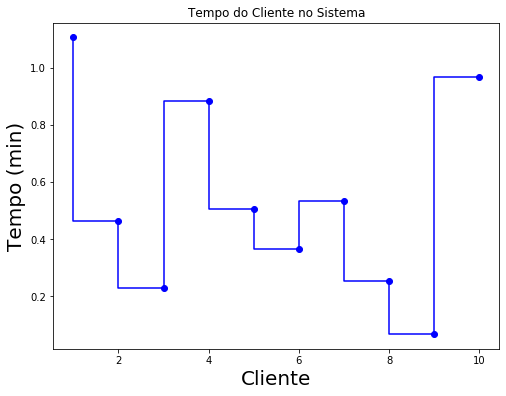

In [97]:
tempo_sistema = np.zeros(Numero_clientes)
#for k in range(Numero_clientes):
#    tempo_sistema.append(0)
    
for i in range(Numero_clientes):
     tempo_sistema[i] = tempo_saida[i] - tempo_chegada[i]

print('tempo do cliente no sistema', tempo_sistema)

plt.figure(figsize=(8,6))
plt.title("Tempo do Cliente no Sistema")
plt.xlabel("Cliente", fontsize=20)
plt.ylabel("Tempo (min)", fontsize=20)
plt.step( cliente, tempo_sistema, 'bo-')
plt.show()

## Tempo médio estimado de clientes no sistema

O tempo médio estimado que os clientes passam no sistema é igual a soma dos tempos que cada cliente passa no sistema dividido pelo número de clientes

O tempo médio teórico é $ET = 1/(\lambda_s - \lambda)$

In [58]:
tempo_esperado_sistema = sum(tempo_sistema)/Numero_clientes
tempo_teorico_sistema = 1/(taxa_servico - taxa_chegadas)
print('Tempo médio estimado de clientes no sistema ', '%.2f'% tempo_esperado_sistema, ' min')
print('Tempo médio teórico de clientes no sistema ', '%.2f'% tempo_teorico_sistema, ' min')

Tempo médio estimado de clientes no sistema  1.606730317131416  min
Tempo médio teórico de clientes no sistema  2.0  min


# Número de clientes no sistema

O número de clientes no sistema pode ser calculado da seguinte forma
- conta, a partir do primeiro cliente, o número de clientes que chegam antes do primeiro cliente sair
- quando ele sai é contado -1
- conta o número de clientes que chegam, a partir da saída do primeiro cliente, até a saída do segundo 
- e assim por diante, até o último cliente sair


eventos ent/saída [ 2.84  3.95  4.01  4.47  5.11  5.19  5.34  5.8   6.07  6.13  6.31  6.42
  6.49  6.95  7.57  7.83  7.95  8.02  9.64 10.61]
Clientes no sistema [1. 0. 1. 0. 1. 2. 1. 2. 1. 2. 1. 2. 1. 0. 1. 0. 1. 0. 1. 0.]
0


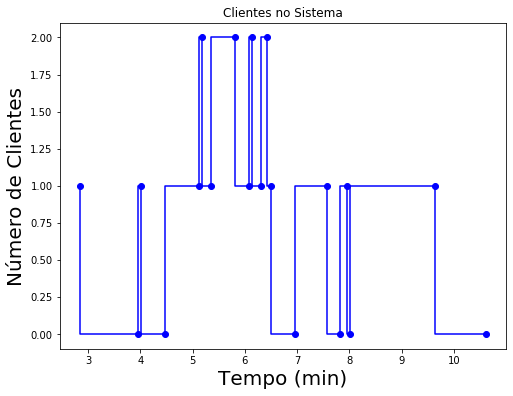

In [98]:
clientes_no_sistema = np.zeros(2*Numero_clientes)
eventos_ES = np.zeros(2*Numero_clientes) # tempos de chegada e de saída ordenados

#dobro = 2*Numero_clientes
#for k in range(dobro):
#    clientes_no_sistema.append(0)
#    eventos_ES.append(0)

contador = 0
j = 0

for i in range(Numero_clientes):
    if(j < Numero_clientes):
        while((tempo_saida[i] > tempo_chegada[j])): # and (i < (Numero_clientes-1))):
            contador += 1 
            clientes_no_sistema[i+j] = contador
            eventos_ES[j+i] = tempo_chegada[j]
            j += 1
            if(j == Numero_clientes):
                break
        contador -=1
        clientes_no_sistema[i+j] = contador
        eventos_ES[j+i] = tempo_saida[i]

print('eventos ent/saída', eventos_ES)
print('Clientes no sistema', clientes_no_sistema)
print(contador)

plt.figure(figsize=(8,6))
plt.title("Clientes no Sistema")
plt.ylabel("Número de Clientes", fontsize=20)
plt.xlabel("Tempo (min)", fontsize=20)
plt.step(eventos_ES, clientes_no_sistema, '-bo')
plt.show()

## Estimativa da taxa de chegadas

$\hat{\lambda} =$ Numero de clientes/tempo de chegada do último cliente

taxa correta, (a que gerou os valores) $\lambda = 1$ cliente/min

In [99]:
lambda_estimado = Numero_clientes/tempo_chegada[Numero_clientes-1]

print('Taxa de chegadas estimada', '%.2f'% lambda_estimado, ' clientes/min')

Taxa de chegadas estimada 1.04  clientes/min


## Estimativa da taxa de atendimento (serviço)

$\hat{\lambda}_s =$ Numero de clientes/soma dos tempos de atendimento

taxa correta, (a que gerou os valores) $\lambda_s = 1,5$ cliente/min

In [100]:
lambda_s_estimado = Numero_clientes/sum(tempo_servico)

print('Taxa de atendimento estimada', '%.2f'% lambda_s_estimado, ' clientes/min')

Taxa de atendimento estimada 2.13  clientes/min


## Utilização do sistema estimada

Ou a probabilidade do atendente estar ocupado

$\hat{\rho} = \hat{\lambda}/\hat{\lambda}_s$

Valor correto $\rho = \lambda/\lambda_s = 1/1,5 = 0,6667$

In [101]:
rho_estimado = lambda_estimado/lambda_s_estimado
rho = taxa_chegadas/taxa_servico

print('Utilização do sistema estimada ', '%.2f'% rho_estimado)
print('Utilização do sistema ', '%.2f'% rho)

Utilização do sistema estimada  0.49
Utilização do sistema  0.67


## Número médio de clientes estimado no sistema

$E\hat{N} = \hat{\rho} / (1-\hat{\rho})$

O valor esperado do número de clientes no sistema é dado por

$EN = \rho / (1-\rho)$



In [102]:
EN_estimado =  rho_estimado / (1 - rho_estimado)
EN = rho / (1 - rho)

print('Número médio de clientes no sistema estimado ', '%.2f'% EN_estimado)
print('Número médio de clientes no sistema ', '%.2f'% EN)

Número médio de clientes no sistema estimado  0.95
Número médio de clientes no sistema  2.00
